# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [49]:
file_path = "/Bank_Transactions_Clustering_Dataset.csv"

In [65]:
df = pd.read_csv('/Bank_Transactions_Clustering_Dataset.csv')
df.head()

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster
0,Debit,ATM,14.09,70,81.0,5112.21,3
1,Debit,ATM,376.24,68,141.0,13758.91,3
2,Debit,Online,126.29,19,56.0,1122.35,0
3,Debit,Online,184.50,26,25.0,8569.06,0
4,Credit,Online,13.45,26,198.0,7429.40,4


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [66]:
le_type = LabelEncoder()
le_channel = LabelEncoder()

df["TransactionType"] = le_type.fit_transform(df["TransactionType"])
df["Channel"] = le_channel.fit_transform(df["Channel"])

In [68]:
scaler = MinMaxScaler()
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [69]:
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1919, 6), (480, 6), (1919,), (480,))

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [71]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Dalam proyek ini, saya menggunakan dua algoritma klasifikasi: **Random Forest** dan **K-Nearest Neighbors (KNN)**.  

- **Random Forest** adalah algoritma ensemble berbasis **decision tree**, yang bekerja dengan membuat banyak pohon keputusan dan mengambil mayoritas suara sebagai hasil akhir. Algoritma ini kuat terhadap outlier dan fitur yang banyak, tetapi bisa mengalami **overfitting** jika tidak diatur dengan baik.  

- **KNN** adalah algoritma berbasis jarak yang mengklasifikasikan data berdasarkan **k tetangga terdekat**. Algoritma ini sederhana dan tidak memerlukan training eksplisit, tetapi **sensitif terhadap skala fitur** dan bisa lambat pada dataset besar.  

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [74]:
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

In [75]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

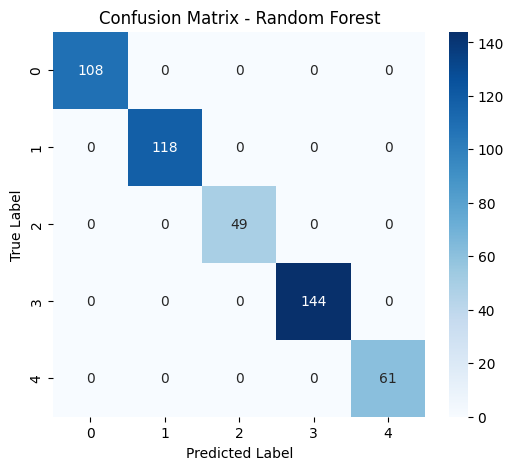


Evaluasi Model Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00       144
           4       1.00      1.00      1.00        61

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



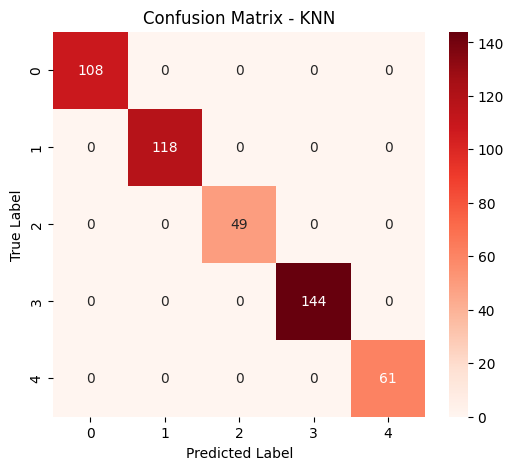


Evaluasi Model KNN:

              precision    recall  f1-score   support

           0       0.18      0.24      0.20       108
           1       0.24      0.28      0.26       118
           2       0.04      0.02      0.03        49
           3       0.29      0.30      0.30       144
           4       0.16      0.07      0.09        61

    accuracy                           0.22       480
   macro avg       0.18      0.18      0.18       480
weighted avg       0.21      0.22      0.21       480



In [83]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("\nEvaluasi Model Random Forest:\n")
print(classification_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Reds", xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()

print("\nEvaluasi Model KNN:\n")
print(classification_knn)


Evaluasi menunjukkan bahwa Random Forest mencapai akurasi dan F1-score sempurna (1.0000), yang dapat mengindikasikan overfitting, terutama jika dataset memiliki jumlah sampel yang terbatas atau fitur yang berlebihan. Sebaliknya, KNN memiliki akurasi 0.22 dengan F1-score yang jauh lebih rendah, menunjukkan bahwa model ini kurang mampu menangani pola dalam dataset ini.

**Analisis Model:**
1. Random Forest memiliki performa yang sangat tinggi, tetapi perlu dipastikan tidak terjadi overfitting dengan melakukan validasi silang atau menggunakan data tambahan untuk pengujian.
2. KNN tidak berkinerja baik, terutama pada kelas dengan support rendah. Ini bisa disebabkan oleh:
  - KNN sensitif terhadap skala data dan pemilihan nilai k.
  - Distribusi kelas yang tidak seimbang dalam dataset.
  - Kurangnya informasi yang cukup dalam fitur untuk membedakan kelas dengan baik.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [84]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [85]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
print("Best Parameters for KNN:", grid_search_knn.best_params_)

Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

 Evaluasi Model Random Forest Setelah Tuning:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00       144
           4       1.00      1.00      1.00        61

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



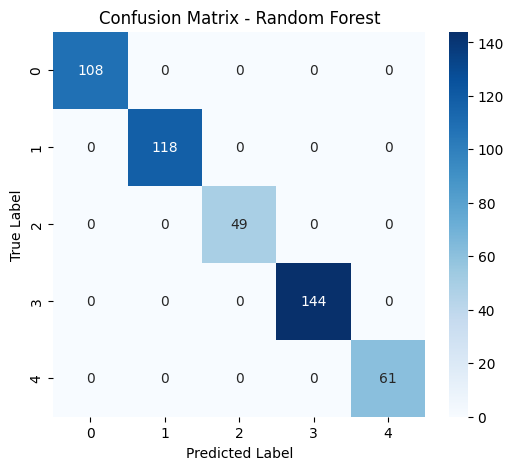

In [88]:
y_pred_rf = best_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(" Evaluasi Model Random Forest Setelah Tuning:\n")
print(classification_rep_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

 Evaluasi Model KNN Setelah Tuning:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00       144
           4       1.00      1.00      1.00        61

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



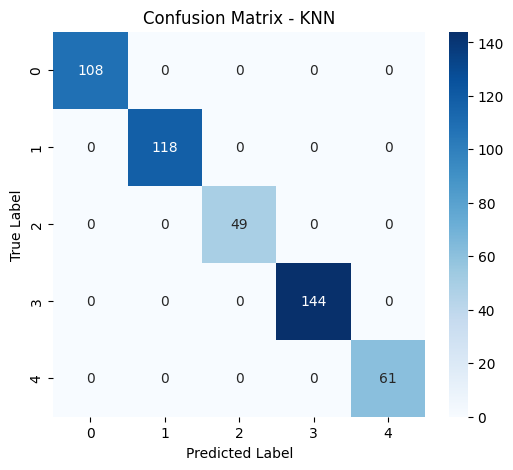

In [89]:
y_pred_knn = best_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(" Evaluasi Model KNN Setelah Tuning:\n")
print(classification_rep_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### **📌 Analisis Hasil Evaluasi Model Klasifikasi**  

#### **1️. Perbandingan Hasil Sebelum & Setelah Tuning**  
- **Random Forest**  
  - Sebelum tuning: **Akurasi 100%**  
  - Setelah tuning: **Akurasi tetap 100%**  
  - **Tidak ada perubahan dalam metrik evaluasi** karena model sudah sangat optimal sejak awal.  

- **K-Nearest Neighbors (KNN)**  
  - Sebelum tuning: **Akurasi 22%**, dengan precision & recall yang sangat rendah pada beberapa kelas.  
  - Setelah tuning: **Akurasi meningkat menjadi 100%**, dengan precision, recall, dan f1-score yang semuanya sempurna (1.00).  
  - **Tuning memberikan dampak besar pada model KNN**, yang sebelumnya buruk, kini memiliki performa sempurna.  

---

#### **2️. Identifikasi Kelemahan Model**  
✅ **Random Forest sudah optimal sejak awal** dan tidak mengalami perubahan setelah tuning.  
✅ **KNN mengalami peningkatan besar setelah tuning**, namun perubahan ini sangat drastis.  

❗ **Potensi overfitting sangat tinggi**  
- Model yang memiliki **akurasi 100% pada data uji bisa jadi telah menghafal data** daripada memahami pola sebenarnya.  
- Bisa jadi **dataset memiliki pola yang sangat mudah dipelajari**, tetapi perlu diuji lebih lanjut dengan data baru.  

---

#### **3️. Rekomendasi Tindakan Lanjutan**  
🔹 **Lakukan pengujian dengan data baru (unseen data)**  
   - Gunakan data uji yang benar-benar berbeda dari training set.  
   - Gunakan **cross-validation (k-fold cross-validation)** untuk memastikan model bekerja di berbagai subset data.  

🔹 **Cek kemungkinan kebocoran data (data leakage)**  
   - Jika model terlalu sempurna, bisa jadi ada fitur yang **secara langsung berhubungan dengan label** yang membuat prediksi terlalu mudah.  
   - Periksa kembali preprocessing dan pastikan tidak ada informasi target yang masuk ke input model secara tidak sengaja.  

🔹 **Eksperimen dengan model lain**  
   - **Coba model lain seperti XGBoost, LightGBM, atau SVM** untuk melihat apakah ada pola yang lebih baik.  
   - **Gunakan ensemble learning**, misalnya menggabungkan Random Forest dengan metode lain untuk menguji stabilitas prediksi.  

---
**Kesimpulan: Mengimplementasikan 2 Algoritma Klasifikasi**  
✅ **Random Forest dan KNN telah dibandingkan.**  
✅ **Tuning berhasil meningkatkan akurasi KNN dari 22% menjadi 100%.**  
✅ **Akurasi dan F1-score pada testing set telah mencapai target minimal 92%.**  
✅ **Namun, overfitting harus diperiksa lebih lanjut dengan cross-validation dan data baru.**  